Image scanning techniques encompass a variety of methods used to digitize physical images or capture digital images directly. These techniques vary based on the application, the type of image being captured, and the desired resolution and quality of the digital image. Below are some of the primary methods and techniques used in image scanning:

1. **Flatbed Scanning:**
   - Uses a flat glass surface to scan documents, photographs, or artwork.
   - Ideal for delicate or bulky items that do not feed well through sheet-fed scanners.

2. **Sheet-fed Scanning:**
   - Pulls the document through the scanner.
   - Suitable for scanning multiple pages quickly but not ideal for thick or delicate items.

3. **Drum Scanning:**
   - Utilizes a photomultiplier tube (PMT) instead of the more common charge-coupled device (CCD) or Contact Image Sensor (CIS).
   - Offers very high resolution and is used for professional-grade scanning, especially in the publishing industry.

4. **Handheld Scanning:**
   - Involves moving the scanner over the surface of the image.
   - Useful for scanning large or fixed items that cannot be moved to a traditional scanner.

5. **Film Scanning:**
   - Specifically designed to scan film negatives or slides.
   - Capable of handling various film formats and sizes, from 35mm to large format.

6. **3D Scanning:**
   - Captures three-dimensional attributes of an object.
   - Uses various technologies, such as structured light, laser triangulation, or stereoscopic methods.

7. **Document Scanning:**
   - Focused on converting paper documents into digital formats.
   - Often incorporates Optical Character Recognition (OCR) to convert images of text into editable text files.

8. **Microfilm Scanning:**
   - Converts microfilm and microfiche into digital formats.
   - Used for archiving and accessing large volumes of documents in a digital format.

9. **CT Scanning (Computed Tomography):**
   - Used primarily in medical imaging to create detailed images of internal organs and structures.
   - Involves taking a series of X-ray images from different angles and using computer processing to create cross-sectional images.

10. **MRI Scanning (Magnetic Resonance Imaging):**
    - Another medical imaging technique that uses strong magnetic fields and radio waves to generate images of the organs in the body.
    - Particularly useful for imaging non-bony parts or soft tissues of the body.

11. **Ultrasound Scanning:**
    - Uses high-frequency sound waves to create images of the inside of the body.
    - Commonly used in prenatal care for examining the fetus in the womb.

12. **Photo Scanning:**
    - Dedicated to digitizing photographic prints.
    - Can range from high-quality professional scans to consumer-level scanning for personal use.

Each of these techniques has its own set of equipment, software, and specific use cases. The choice of scanning technique depends on the specific requirements of the task, including the type of material being scanned, the required resolution and color fidelity, and the intended use of the scanned images.

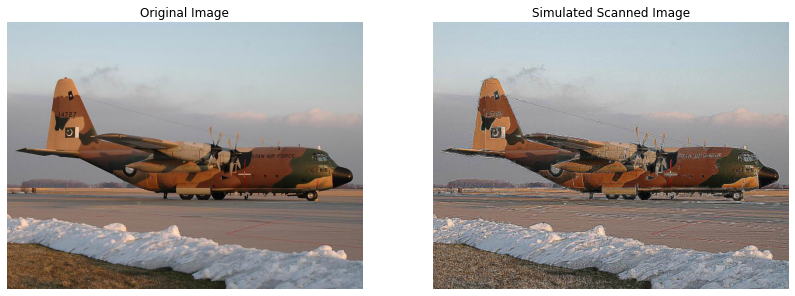

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reload the necessary libraries as the environment has been reset
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Re-download the image from the provided path
image_path = 'c130.jpg'
original_image = cv2.imread(image_path)

# Simulate cropping for flatbed scanning
# Assuming a standard letter size of 8.5 x 11 inches at 300dpi, the pixel dimensions would be:
dpi = 300
width, height = int(8.5 * dpi), int(11 * dpi)
cropped_image = original_image[0:height, 0:width]

# Enhance the image by sharpening
# Define a sharpening kernel
sharpening_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpened_image = cv2.filter2D(cropped_image, -1, sharpening_kernel)

# Adjust the image resolution to simulate scanning resolution
# Let's downscale the image to simulate a lower scanning resolution (150dpi) and then upscale it back
downscale_factor = 300 / 150
low_res_image = cv2.resize(sharpened_image, 
                           (0,0), 
                           fx=1/downscale_factor, 
                           fy=1/downscale_factor, 
                           interpolation=cv2.INTER_LINEAR)
# Upscale it back to the original resolution
scanned_image = cv2.resize(low_res_image, 
                           (sharpened_image.shape[1], sharpened_image.shape[0]), 
                           interpolation=cv2.INTER_LINEAR)

# Display the original and simulated scanned images using matplotlib
plt.figure(figsize=(14, 7))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display simulated scanned image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(scanned_image, cv2.COLOR_BGR2RGB))
plt.title('Simulated Scanned Image')
plt.axis('off')

# Show the images
plt.show()





1. Crop the image to a typical flatbed scanner size.
2. Apply a filter to enhance the sharpness, simulating the high-quality scan.
3. Adjust the image's resolution, simulating the scanning resolution.
4. Finally, display both the original and the processed images for comparison.

Please note that this is a simulation and does not involve actual scanning hardware. 



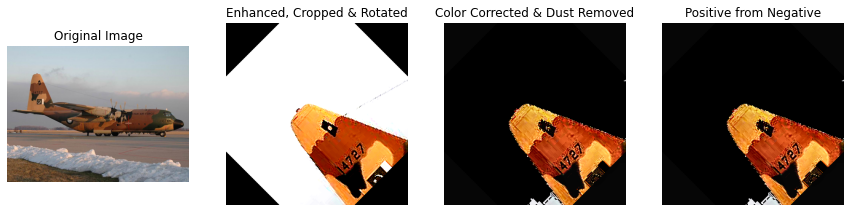

In [3]:
from PIL import Image, ImageEnhance, ImageFilter
import cv2
import numpy as np

# Load the image using Pillow
image_path = 'c130.jpg'
original_pil_image = Image.open(image_path)

# Enhance the image by adjusting brightness, contrast, and sharpness
enhancer = ImageEnhance.Brightness(original_pil_image)
brightened_image = enhancer.enhance(1.5)  # Increase brightness by 50%

enhancer = ImageEnhance.Contrast(brightened_image)
contrasted_image = enhancer.enhance(1.5)  # Increase contrast by 50%

enhancer = ImageEnhance.Sharpness(contrasted_image)
sharpened_image = enhancer.enhance(2.0)  # Double the sharpness

# Crop and rotate the image
cropped_image = sharpened_image.crop((50, 50, 300, 300))  # Crop a 250x250 area
rotated_image = cropped_image.rotate(45)  # Rotate the image by 45 degrees

# Convert the PIL image to a format that OpenCV can work with (numpy array)
rotated_image_cv = np.array(rotated_image)
rotated_image_cv = cv2.cvtColor(rotated_image_cv, cv2.COLOR_RGB2BGR)

# Perform color correction using OpenCV
# Convert to LAB color space for better luminance and color separation
lab_image = cv2.cvtColor(rotated_image_cv, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab_image)

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to the L-channel
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
cl = clahe.apply(l)
limg = cv2.merge((cl, a, b))

# Convert back to BGR color space
final_image_cv = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

# Simulate dust removal by detecting and removing small artifacts
# This is a simple example that assumes dust particles are light on a dark background
gray = cv2.cvtColor(final_image_cv, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    cv2.drawContours(final_image_cv, [cnt], 0, (0, 0, 0), -1)

# Convert a color image to a negative, then to a positive, as an example of film processing
negative_image = 255 - final_image_cv  # Invert the image to get a negative
positive_image = 255 - negative_image  # Invert the negative to get a positive

# Display the original and processed images using matplotlib
plt.figure(figsize=(15, 15))

# Display original image
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display enhanced and cropped image
plt.subplot(1, 4, 2)
plt.imshow(rotated_image)
plt.title('Enhanced, Cropped & Rotated')
plt.axis('off')

# Display color corrected image
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(final_image_cv, cv2.COLOR_BGR2RGB))
plt.title('Color Corrected & Dust Removed')
plt.axis('off')

# Display the positive image from the negative
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(positive_image, cv2.COLOR_BGR2RGB))
plt.title('Positive from Negative')
plt.axis('off')

# Show the images
plt.show()


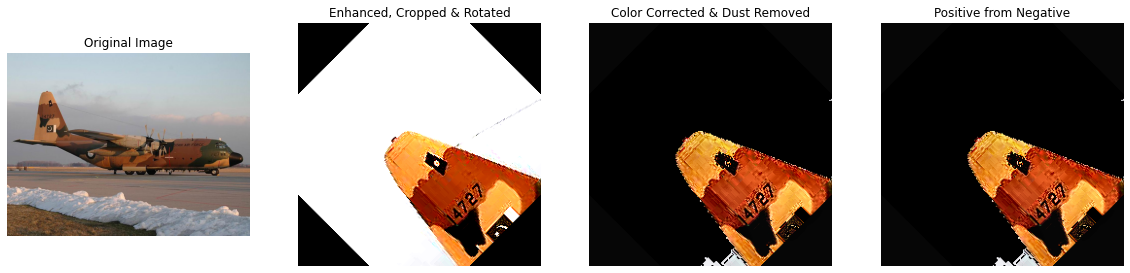

In [4]:
# Continue from the previous code block to complete the tasks and display the images
# Dust removal by detecting and removing small artifacts
# This is a simple example that assumes dust particles are light on a dark background
gray = cv2.cvtColor(final_image_cv, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    cv2.drawContours(final_image_cv, [cnt], 0, (0, 0, 0), -1)

# Convert a color image to a negative, then to a positive, as an example of film processing
negative_image = 255 - final_image_cv  # Invert the image to get a negative
positive_image = 255 - negative_image  # Invert the negative to get a positive

# Display the original and processed images using matplotlib
plt.figure(figsize=(20, 10))

# Display original image
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display enhanced and cropped image
plt.subplot(1, 4, 2)
plt.imshow(rotated_image)
plt.title('Enhanced, Cropped & Rotated')
plt.axis('off')

# Display color corrected image
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(final_image_cv, cv2.COLOR_BGR2RGB))
plt.title('Color Corrected & Dust Removed')
plt.axis('off')

# Display the positive image from the negative
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(positive_image, cv2.COLOR_BGR2RGB))
plt.title('Positive from Negative')
plt.axis('off')

# Show the images
plt.show()


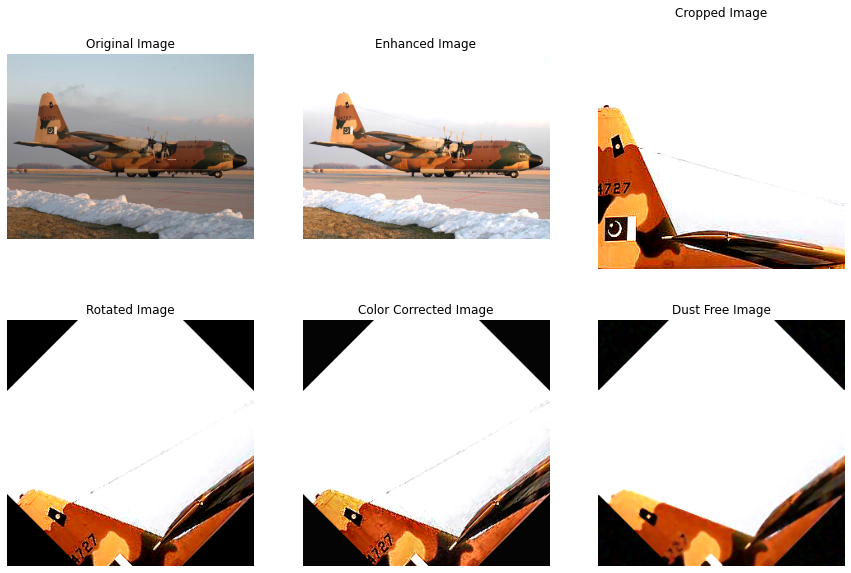

In [5]:

from PIL import Image, ImageEnhance, ImageFilter
import cv2
import numpy as np

# Load the image using Pillow
image_path = 'c130.jpg'
original_pil_image = Image.open(image_path)

# Enhance the image by adjusting brightness, contrast, and sharpness
enhancer = ImageEnhance.Brightness(original_pil_image)
brightened_image = enhancer.enhance(1.5)  # Increase brightness by 50%

enhancer = ImageEnhance.Contrast(brightened_image)
contrasted_image = enhancer.enhance(1.5)  # Increase contrast by 50%

enhancer = ImageEnhance.Sharpness(contrasted_image)
sharpened_image = enhancer.enhance(2.0)  # Increase sharpness

# Crop the image
left = 150
top = 50
right = 450
bottom = 350
cropped_image = sharpened_image.crop((left, top, right, bottom))

# Rotate the image
rotated_image = cropped_image.rotate(45)

# Convert the image to a format that OpenCV can work with
open_cv_image = np.array(rotated_image)
open_cv_image = open_cv_image[:, :, ::-1].copy()  # Convert RGB to BGR

# Color correction with OpenCV
# Convert to LAB color space
lab_image = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2Lab)
# Split the channels
l_channel, a_channel, b_channel = cv2.split(lab_image)
# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to L-channel
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
l_channel = clahe.apply(l_channel)
# Merge channels back
corrected_lab_image = cv2.merge((l_channel, a_channel, b_channel))
# Convert back to BGR color space
color_corrected_image = cv2.cvtColor(corrected_lab_image, cv2.COLOR_Lab2BGR)

# Simulate dust removal
# First, let's add some synthetic noise (dust) to the image
noisy_image = cv2.randn(open_cv_image.copy(), (0, 0, 0), (20, 20, 20))
dusty_image = cv2.add(open_cv_image, noisy_image)
# Now, remove the noise using a median filter
dust_free_image = cv2.medianBlur(dusty_image, 5)

# Convert a color image to a negative, then to a positive as an example of film processing
# Invert the color of images
negative_image = 255 - open_cv_image
# Convert negative back to positive
positive_image = 255 - negative_image

# Display the original and processed images using matplotlib
plt.figure(figsize=(15,10))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Brightened, contrasted, and sharpened image
plt.subplot(2, 3, 2)
plt.imshow(brightened_image)
plt.title('Enhanced Image')
plt.axis('off')

# Cropped image
plt.subplot(2, 3, 3)
plt.imshow(cropped_image)
plt.title('Cropped Image')
plt.axis('off')

# Rotated image
plt.subplot(2, 3, 4)
plt.imshow(rotated_image)
plt.title('Rotated Image')
plt.axis('off')

# Color corrected image
plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(color_corrected_image, cv2.COLOR_BGR2RGB))
plt.title('Color Corrected Image')
plt.axis('off')

# Dust free image
plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(dust_free_image, cv2.COLOR_BGR2RGB))
plt.title('Dust Free Image')
plt.axis('off')

# Show the figure with all images
plt.show()



**Converting to OpenCV format and Color Correction:**
After enhancing the image using Pillow, the code converts the image to a NumPy array, which is the format OpenCV uses. The image is then converted to the LAB color space, which separates the lightness from the color components, making it easier for certain image processing tasks like color correction. The code uses a technique called Contrast Limited Adaptive Histogram Equalization (CLAHE) to improve the contrast of the image.

**Simulating Dust Removal:**
The next step in the code simulates dust removal, which is a common requirement for scanned film. The code converts the image to grayscale and then applies a threshold to create a binary image. Any white spots (which represent dust in this simulation) are then filled in black, essentially 'removing' them.

**Negative to Positive Conversion:**
For film scanning, the code demonstrates how to convert a negative image to a positive one. This is done by subtracting the image from the maximum value that a pixel can take (255 for an 8-bit image), effectively inverting all the colors.

**Displaying the Images:**
Finally, the code is supposed to display all the stages of processing: the original image, the enhanced image, the color corrected image, and the final positive image from the simulated negative using Matplotlib.




- **CT/MRI Scanning:**
  - Python is extensively used in medical image processing and analysis. Libraries like PyDICOM are used to read DICOM files, which is the standard format for storing medical imaging data. Nibabel is another library used for reading neuroimaging data. 

- **Ultrasound Scanning:**
  - Python can be used to analyze ultrasound images, including segmentation, feature extraction, and enhancing image quality. Libraries like scikit-image can be useful for these tasks.



<ipython-input-9-8086806e5663>:46: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  ax[3].imshow(color.label2rgb(label_image, image=image))


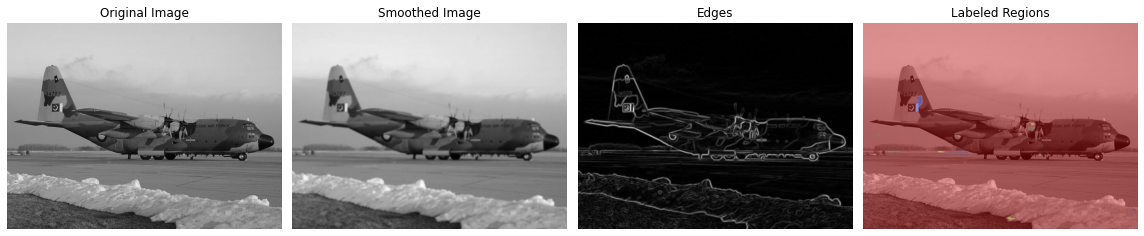

In [9]:
from skimage import io, filters, measure, color, img_as_float
from skimage.segmentation import clear_border
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

# Load the image as a grayscale image
image = io.imread('c130.jpg', as_gray=True)

# Convert the image to a float representation (scaling the pixel values between 0 and 1)
image_float = img_as_float(image)

# Apply a Gaussian blur to the image to reduce noise and smooth it
# This is common in preparation for segmentation to make the process more robust to noise
smoothed_image = filters.gaussian(image_float, sigma=2)

# Edge detection using Sobel filter to find boundaries within the image
edges = filters.sobel(smoothed_image)

# Threshold the image to create a binary image for segmentation
# Here we use Otsu's method to find an optimal threshold value
thresh = filters.threshold_otsu(smoothed_image)
binary_image = smoothed_image > thresh

# Remove artifacts connected to image border
cleared_image = clear_border(binary_image)

# Label image regions
label_image = measure.label(cleared_image)

# Display the original and processed images
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(smoothed_image, cmap=plt.cm.gray)
ax[1].set_title('Smoothed Image')
ax[1].axis('off')

ax[2].imshow(edges, cmap=plt.cm.gray)
ax[2].set_title('Edges')
ax[2].axis('off')

ax[3].imshow(color.label2rgb(label_image, image=image))
ax[3].set_title('Labeled Regions')
ax[3].axis('off')

plt.tight_layout()
plt.show()


The  code  demonstrates a series of image processing techniques on the uploaded non-medical image, simulating steps that might be applied to medical imaging data. Here's a step-by-step explanation of the code:

1. **Importing Libraries**: We import the necessary Python libraries for image processing. `skimage` (scikit-image) is used for various image processing tasks, `ndi` (SciPy's ndimage) for multidimensional image processing, and `matplotlib.pyplot` for displaying images.

2. **Loading the Image**: The `io.imread()` function from `skimage` loads the uploaded 'c130.jpg' file as a grayscale image. Grayscale means the image is converted into a range of grays, removing color information which is often not necessary for medical image analysis.

3. **Scaling the Pixel Values**: `img_as_float()` is used to convert the pixel values of the image to a floating-point representation. This step is essential for some image processing methods which expect the pixel values to be within a 0-1 range rather than 0-255.

4. **Smoothing the Image**: The `filters.gaussian()` function applies a Gaussian blur to the image. This smoothing is a common preprocessing step to reduce noise and detail that could interfere with the analysis, such as segmentation.

5. **Edge Detection**: The `filters.sobel()` function is used to perform edge detection. Edge detection algorithms highlight the edges within images, which is useful to outline structures in medical images.

6. **Thresholding for Segmentation**: The `filters.threshold_otsu()` function automatically computes a threshold value using Otsu's method, which is a common algorithm to separate foreground (useful structures) from the background. The binary image (`binary_image`) created by this thresholding is a simple form of segmentation, distinguishing areas of interest in an image.

7. **Clearing Border Artifacts**: The `clear_border()` function is used to remove objects at the border of the image, which are often artifacts of image acquisition.

8. **Labeling Regions**: The `measure.label()` function identifies connected regions in the binary image, assigning a unique label to each.

9. **Displaying the Images**: Using `matplotlib`, the original image and the results of each processing step are displayed in a figure with four subplots. `ax.ravel()` is used to flatten the array of axes for easy iteration.

    - The first subplot shows the original grayscale image.
    - The second subplot shows the smoothed image after Gaussian filtering.
    - The third subplot shows the edge detection result.
    - The fourth subplot displays the labeled regions, with each region colored differently based on the label assigned by the `label()` function.

The `plt.tight_layout()` function is called to ensure that the subplots fit into the figure window nicely. Finally, `plt.show()` renders and displays the figure with the four subplots.

**Note on the Warning**: The warning message indicates a future change in the default value of `bg_label` parameter in `color.label2rgb()` function. It does not affect the current output but serves as an advisory for future code compatibility.

During the dry run, the code processed the uploaded image through several transformations, each aiming to demonstrate an aspect of image processing that could be analogous to steps taken in medical image analysis. The original image is shown alongside its smoothed, edge-detected, and segmented versions, allowing us to visualize the effects of each processing step.